_Potential Names_ 

- Urban WBT Island 
- UHI WBT 
- Urban Temperature Experience 
- Human-Oriented UHI 
- Global Urban WBT Island Study 

# Imports

In [1]:
# Imports 
%matplotlib inline
import os, glob
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
cd /glade/work/joyceyang

/glade/work/joyceyang


In [3]:
# Import Dataset
nc1 = xr.open_dataset('clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-01.nc')

In [19]:
nc1

<xarray.Dataset>
Dimensions:             (column: 505972, gridcell: 21013, hist_interval: 2, landunit: 62100, lat: 192, levdcmp: 25, levgrnd: 25, levlak: 10, lon: 288, nvegwcs: 4, pft: 800154, time: 1)
Coordinates:
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.325 44.775
  * levdcmp             (levdcmp) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * time                (time) object 2015-02-01 00:00:00
  * lon                 (lon) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * lat                 (lat) float32 -90.0 -89.057594 ... 89.057594 90.0
Dimensions without coordinates: column, gridcell, hist_interval, landunit, nvegwcs, pft
Data variables:
    mcdate              (time) int32 ...
    mcsec               (time) int32 ...
    mdcur               (time) int32 ...
    mscur               (time) int32 ...
    nstep               (time) int32 ...
    time_bounds         (time, hist_interval) object ...
    date_written        (time) |S16 ...
    time_written        (time) |S16 ...
    area                (lat, lon) float32 ...
    landfrac            (lat, lon) float32 ...
    landmask            (lat, lon) float64 ...
    pftmask             (lat, lon) float64 ...
    nbedrock            (lat, lon) float64 ...
    grid1d_lon          (gridcell) float64 ...
    grid1d_lat          (gridcell) float64 ...
    grid1d_ixy          (gridcell) int32 ...
    grid1d_jxy          (gridcell) int32 ...
    land1d_lon          (landunit) float64 ...
    land1d_lat          (landunit) float64 ...
    land1d_ixy          (landunit) int32 ...
    land1d_jxy          (landunit) int32 ...
    land1d_wtgcell      (landunit) float64 ...
    land1d_ityplunit    (landunit) int32 ...
    land1d_active       (landunit) int32 ...
    cols1d_lon          (column) float64 ...
    cols1d_lat          (column) float64 ...
    cols1d_ixy          (column) int32 ...
    cols1d_jxy          (column) int32 ...
    cols1d_wtgcell      (column) float64 ...
    cols1d_wtlunit      (column) float64 ...
    cols1d_itype_col    (column) int32 ...
    cols1d_itype_lunit  (column) int32 ...
    cols1d_active       (column) int32 ...
    pfts1d_lon          (pft) float64 ...
    pfts1d_lat          (pft) float64 ...
    pfts1d_ixy          (pft) int32 1 1 1 1 1 1 1 ... 265 265 265 265 265 265
    pfts1d_jxy          (pft) int32 1 1 1 1 1 1 1 ... 186 186 186 186 186 186
    pfts1d_wtgcell      (pft) float64 ...
    pfts1d_wtlunit      (pft) float64 ...
    pfts1d_wtcol        (pft) float64 ...
    pfts1d_itype_veg    (pft) int32 ...
    pfts1d_itype_col    (pft) int32 ...
    pfts1d_itype_lunit  (pft) int32 1 1 1 1 1 1 1 1 1 1 ... 4 4 4 4 4 4 4 4 4 4
    pfts1d_active       (pft) int32 ...
    AGNPP               (time, pft) float32 ...
    AR                  (time, pft) float32 ...
    BTRANMN             (time, pft) float32 ...
    FCEV                (time, pft) float32 ...
    FCTR                (time, pft) float32 ...
    FGEV                (time, pft) float32 ...
    FIRA                (time, pft) float32 ...
    FIRE                (time, pft) float32 ...
    FSA                 (time, pft) float32 ...
    FSH                 (time, pft) float32 ...
    FSR                 (time, pft) float32 ...
    GPP                 (time, pft) float32 ...
    GRAINC_TO_FOOD      (time, pft) float32 ...
    GSSHALN             (time, pft) float32 ...
    GSSUNLN             (time, pft) float32 ...
    HR                  (time, column) float32 ...
    HTOP                (time, pft) float32 ...
    NFERTILIZATION      (time, pft) float32 ...
    NPP                 (time, pft) float32 ...
    NPP_NUPTAKE         (time, pft) float32 ...
    TLAI                (time, pft) float32 ...
    TOTVEGC             (time, pft) float32 ...
    TREFMNAV            (time, pft) float32 ...
    TREFMXAV            (time, pft) float32 ...
    TSA                 (tim

# Unload/Load Files

In [10]:

# Unload previously created files 
name = '.npy' # file to delete 
for filename in glob.glob("/glade/work/joyceyang/*{}".format(name)):
    os.remove(filename) 


In [4]:
%%time
# Load previously created files 
lat_grid = np.load('lat_grid.npy')
lon_grid = np.load('lon_grid.npy')
tsa_cube_veg = np.load('tsa_cube_veg.npy')
tsa_wtlunit_cube_veg = np.load('tsa_wtlunit_cube_veg.npy')
tsa_cube_TBD = np.load('tsa_cube_TBD.npy')
tsa_wtlunit_cube_TBD = np.load('tsa_wtlunit_cube_TBD.npy')
tsa_cube_HD = np.load('tsa_cube_HD.npy')
tsa_wtlunit_cube_HD = np.load('tsa_wtlunit_cube_HD.npy')
tsa_cube_MD = np.load('tsa_cube_MD.npy')
tsa_wtlunit_cube_MD = np.load('tsa_wtlunit_cube_MD.npy')
tsa_grid_veg = np.load('tsa_grid_veg.npy')
tsa_grid_TBD = np.load('tsa_grid_TBD.npy')
tsa_grid_HD = np.load('tsa_grid_HD.npy')
tsa_grid_MD = np.load('tsa_grid_MD.npy')
wtlunit_gcell_grid_TBD = np.load('wtlunit_gcell_grid_TBD.npy')
wtlunit_gcell_grid_HD = np.load('wtlunit_gcell_grid_HD.npy')
wtlunit_gcell_grid_MD = np.load('wtlunit_gcell_grid_MD.npy')

CPU times: user 18.2 ms, sys: 63.6 ms, total: 81.8 ms
Wall time: 450 ms


# Create Latitude/Longitude Grids

In [5]:
%%time
# Latitude Grid 
lat_grid = np.full((288,192), float("NaN")) #Create grid filled with NaN
lon_grid = np.full((288,192), float("NaN"))

for i in range(1,289): # longitude
    for j in range(1,193): # latitude
        v = nc1.grid1d_lat.where(nc1.grid1d_ixy==i).where(nc1.grid1d_jxy==j).dropna(dim='gridcell').values # create mask to select latitude value for each grid cell 
        w = nc1.grid1d_lon.where(nc1.grid1d_ixy==i).where(nc1.grid1d_jxy==j).dropna(dim='gridcell').values # create mask to select longitude value for each grid cell 
        if v.size == 0: 
            v = [float("NaN")] # fill grid cell with NaN 
        if w.size == 0: 
            w = [float("NaN")]
        lat_grid[i-1, j-1] = v[0] # fill in latitude value 
        lon_grid[i-1, j-1] = w[0]
        
np.save('lat_grid', lat_grid) # save variable 
np.save('lon_grid', lon_grid)

CPU times: user 11min 14s, sys: 9.4 s, total: 11min 24s
Wall time: 11min 24s


# Create Graph Class

In [6]:
%%time
class Graph(): 
    def Plot(title, figname, variable):
        fig, axes = plt.subplots(figsize=(20,10)) # initialize plot of size 20x10
        ax = plt.axes(projection=ccrs.PlateCarree()) # define projection as Plate Carree
        ax.add_feature(cfeature.BORDERS, linestyle=':') # add in country borders
        ax.set_global() # set map extent to global 
        ax.coastlines() # add in coastlines 
        plt.tight_layout()
        
        c = variable - 273 # convert to Celsius 
        
        plt.scatter(lon_grid, lat_grid, c=c, transform=ccrs.PlateCarree(), s=10, marker='s')

        plt.title(title, size=20)
        cbar = plt.colorbar(shrink=0.6) # create colorbar 
        cbar.set_label('Temperature (C)    ', rotation=270)

        plt.savefig(figname)
        

CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 40.1 µs


# Vegetation/Bare Soil

In [7]:
%%time
# Filter for appropriate landunit (Vegetation/Bare Soil)
tsa = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==1) # Squeeze TSA variable over time dimension and create mask that leaves only values that match desired landunit
wt = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==1) # Create mask for pft weight by landunit for the desired landunit
variable = tsa 

tsa_cube_veg = np.full((288,192,15), float("NaN")) 
tsa_wtlunit_cube_veg = np.full((288,192,15), float("NaN")) 

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(variable.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v = tsa[vmask].values
        w = wt[vmask].values
        for k in range(len(v)):
            tsa_cube_veg[i-1, j-1, k] = v[k]
            tsa_wtlunit_cube_veg[i-1,j-1,k] = w[k]
    
tsa_grid_veg = np.nansum((np.multiply(tsa_cube_veg, tsa_wtlunit_cube_veg)), axis=2)

np.save('tsa_cube_veg', tsa_cube_veg)
np.save('tsa_wtlunit_cube_veg', tsa_wtlunit_cube_veg)
np.save('tsa_grid_veg', tsa_grid_veg)

CPU times: user 8min 51s, sys: 79.7 ms, total: 8min 51s
Wall time: 8min 52s


CPU times: user 421 ms, sys: 12 µs, total: 421 ms
Wall time: 423 ms


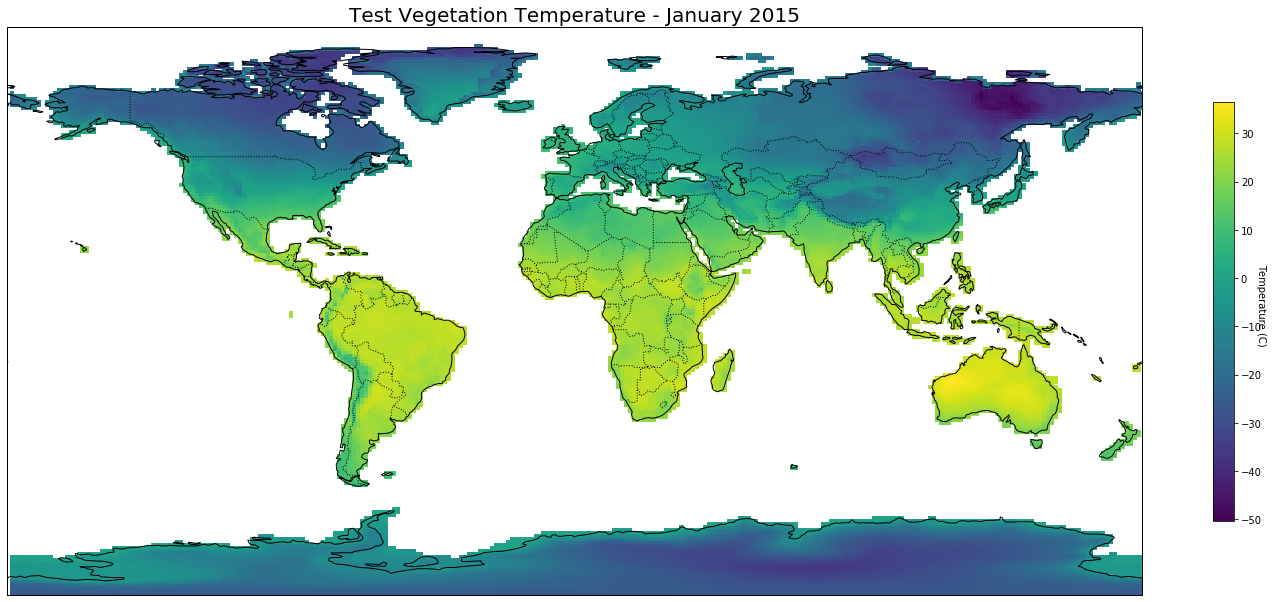

In [39]:
%%time
# Set title, figure name, and variable to plot
title = 'Test Vegetation Temperature - January 2015'
figname = 'Test_Vegetation_Jan2015.jpg'
variable = tsa_grid_veg

# Create figure 
Graph.Plot(title, figname, variable)

# Urban Cube - TBD 

In [19]:
%%time
# Filter for appropriate landunit (Urban Tall Building District)
tsa = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==7)
wt = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==7)
variable = tsa 

tsa_cube_TBD = np.full((288,192,15), float("NaN")) 
tsa_wtlunit_cube_TBD = np.full((288,192,15), float("NaN")) 

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(variable.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)     
        v = tsa[vmask].values
        w = wt[vmask].values
        for k in range(len(v)):
            tsa_cube_TBD[i-1, j-1, k] = v[k]
            tsa_wtlunit_cube_TBD[i-1, j-1, k] = w[k]

tsa_grid_TBD = np.nansum((np.multiply(tsa_cube_TBD, tsa_wtlunit_cube_TBD)), axis=2) 

np.save('tsa_cube_TBD', tsa_cube_TBD)
np.save('tsa_wtlunit_cube_TBD', tsa_wtlunit_cube_TBD)
np.save('tsa_grid_TBD', tsa_grid_TBD)

CPU times: user 18.3 ms, sys: 8.02 ms, total: 26.3 ms
Wall time: 139 ms


CPU times: user 385 ms, sys: 20 ms, total: 405 ms
Wall time: 403 ms


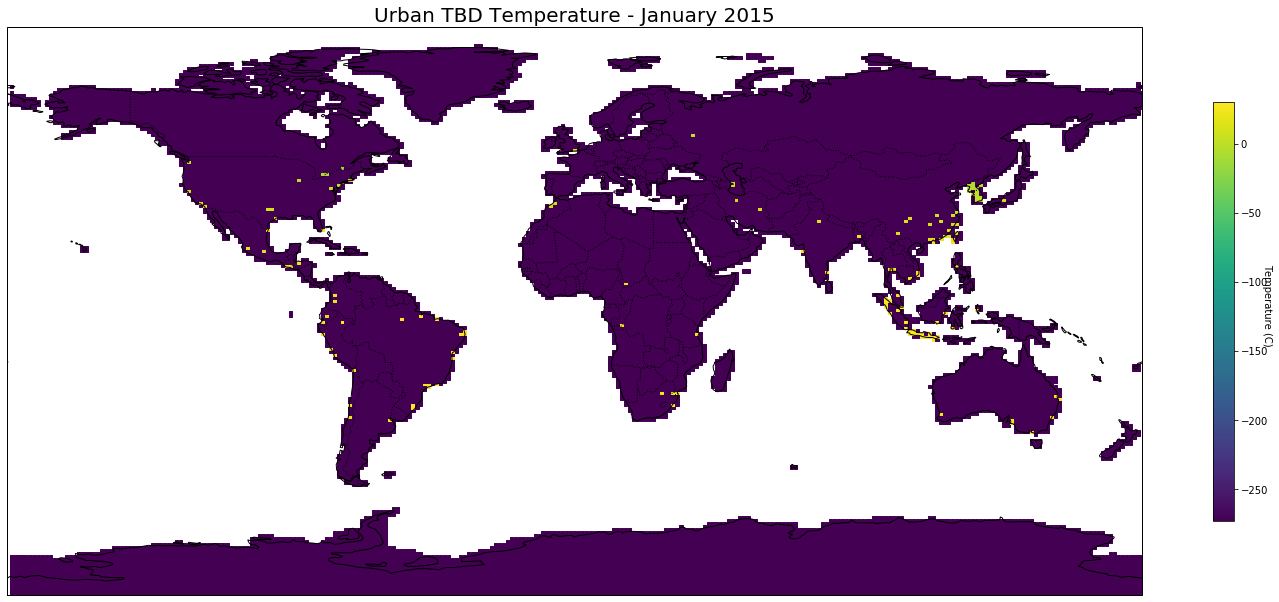

In [22]:
%%time
# Set title, figure name, and variable to plot
title = 'Urban TBD Temperature - January 2015'
figname = 'UrbanTBD_Jan2015.jpg'
variable = tsa_grid_TBD

# Create figure 
Graph.Plot(title, figname, variable)

# Urban Cube - HD 

In [23]:
%%time
# Filter for appropriate landunit (Urban High Density)
tsa = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==8)
wt = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==8)
variable = tsa 

tsa_cube_HD = np.full((288,192,15), float("NaN")) 
tsa_wtlunit_cube_HD = np.full((288,192,15), float("NaN")) 

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(variable.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v = tsa[vmask].values
        w = wt[vmask].values
        for k in range(len(v)):
            tsa_cube_HD[i-1, j-1, k] = v[k]
            tsa_wtlunit_cube_HD[i-1, j-1, k] = w[k]

tsa_grid_HD = np.nansum((np.multiply(tsa_cube_HD, tsa_wtlunit_cube_HD)), axis=2) 

np.save('tsa_cube_HD', tsa_cube_HD)
np.save('tsa_wtlunit_cube_HD', tsa_wtlunit_cube_HD)
np.save('tsa_grid_HD', tsa_grid_HD)

CPU times: user 11.7 ms, sys: 12 ms, total: 23.7 ms
Wall time: 136 ms


CPU times: user 397 ms, sys: 12 ms, total: 409 ms
Wall time: 406 ms


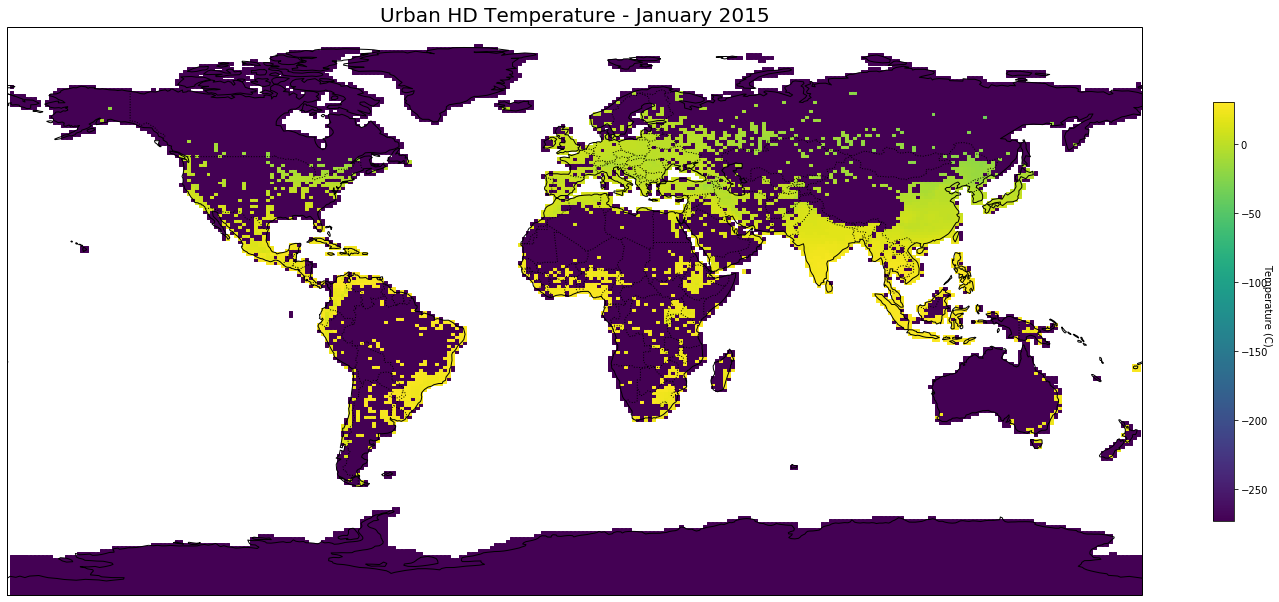

In [26]:
%%time
# Set title, figure name, and variable to plot
title = 'Urban HD Temperature - January 2015'
figname = 'UrbanHD_Jan2015.jpg'
variable = tsa_grid_HD

# Create figure 
Graph.Plot(title, figname, variable)

# Urban Cube - MD

In [27]:
%%time
# Filter for appropriate landunit (Urban Medium Density)
tsa = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==9)
wt = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==9)
variable = tsa 

tsa_cube_MD = np.full((288,192,15), float("NaN")) 
tsa_wtlunit_cube_MD = np.full((288,192,15), float("NaN")) 

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(variable.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v = tsa[vmask].values
        w = wt[vmask].values
        for k in range(len(v)):
            tsa_cube_MD[i-1, j-1, k] = v[k]
            tsa_wtlunit_cube_MD[i-1,j-1,k] = v[k]
    
tsa_grid_MD = np.nansum((np.multiply(tsa_cube_MD, tsa_wtlunit_cube_MD)), axis=2) 

np.save('tsa_cube_MD', tsa_cube_MD)
np.save('tsa_wtlunit_cube_MD', tsa_wtlunit_cube_MD)
np.save('tsa_grid_MD', tsa_grid_MD)

CPU times: user 437 ms, sys: 36 ms, total: 473 ms
Wall time: 432 ms


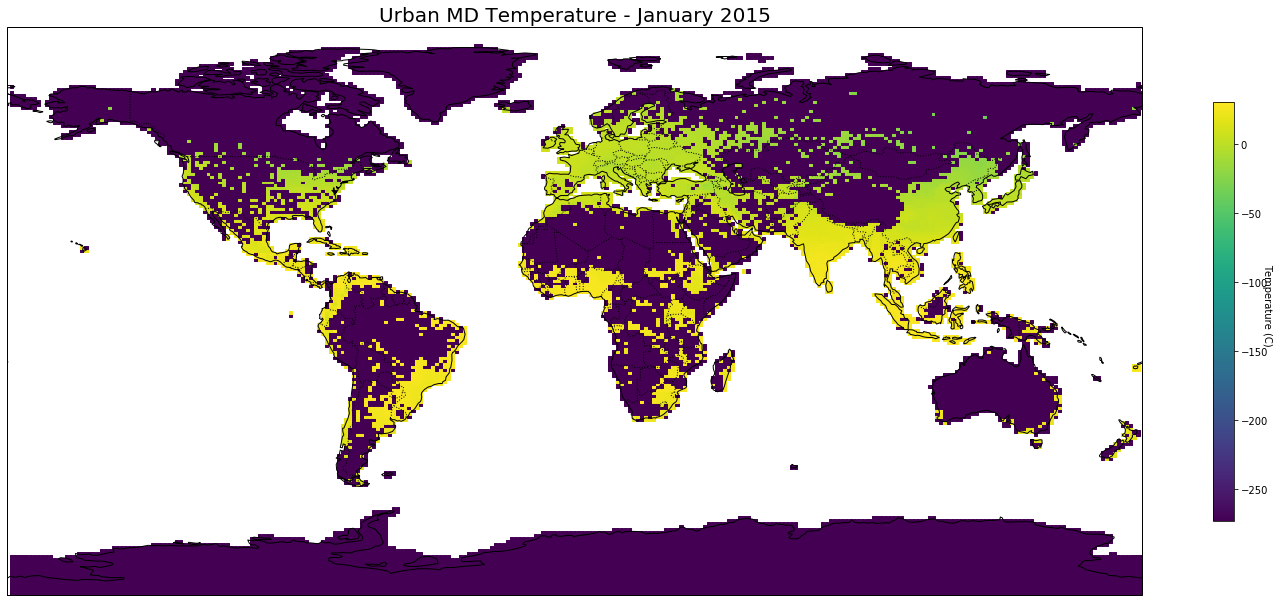

In [30]:
%%time
# Set title, figure name, and variable to plot
title = 'Urban MD Temperature - January 2015'
figname = 'UrbanMD_Jan2015.jpg'
variable = tsa_grid_MD

# Create figure 
Graph.Plot(title, figname, variable)

# Urban Composite

In [31]:
%%time
TBD = nc1.land1d_wtgcell.where(nc1.land1d_ityplunit==7)
wtlunit_gcell_grid_TBD = np.full((288,192), float("NaN")) # should I add in third dimension of 1

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(TBD.where(nc1.land1d_ixy==i).where(nc1.land1d_jxy==j)) == False)
        v = TBD[vmask].values
        if v.size == 0: 
            v = float("NaN")
        wtlunit_gcell_grid_TBD[i-1,j-1] = v

np.save('wtlunit_gcell_grid_TBD', wtlunit_gcell_grid_TBD)

CPU times: user 4min 40s, sys: 40 ms, total: 4min 40s
Wall time: 4min 40s


In [32]:
%%time
HD = nc1.land1d_wtgcell.where(nc1.land1d_ityplunit==8)
wtlunit_gcell_grid_HD = np.full((288,192), float("NaN")) 

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(HD.where(nc1.land1d_ixy==i).where(nc1.land1d_jxy==j)) == False)
        v = HD[vmask].values
        if v.size == 0: 
            v = float("NaN")
        wtlunit_gcell_grid_HD[i-1,j-1] = v

np.save('wtlunit_gcell_grid_HD', wtlunit_gcell_grid_HD)

CPU times: user 4min 41s, sys: 36 ms, total: 4min 41s
Wall time: 4min 41s


In [33]:
%%time
MD = nc1.land1d_wtgcell.where(nc1.land1d_ityplunit==9)
wtlunit_gcell_grid_MD = np.full((288,192), float("NaN")) 

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(MD.where(nc1.land1d_ixy==i).where(nc1.land1d_jxy==j)) == False)
        v = MD[vmask].values
        if v.size == 0: 
            v = float("NaN")
        wtlunit_gcell_grid_MD[i-1,j-1] = v

np.save('wtlunit_gcell_grid_MD', wtlunit_gcell_grid_MD)

CPU times: user 4min 42s, sys: 60 ms, total: 4min 42s
Wall time: 4min 42s


In [9]:
%%time
# Multiple grid weights by weighted TSA 
x = np.multiply(tsa_grid_TBD, wtlunit_gcell_grid_TBD)
y = np.multiply(tsa_grid_HD, wtlunit_gcell_grid_HD)
z = np.multiply(tsa_grid_MD, wtlunit_gcell_grid_MD)

num = np.nansum((x,y,z), axis=0)
den = np.nansum((wtlunit_gcell_grid_TBD,wtlunit_gcell_grid_HD,wtlunit_gcell_grid_MD), axis=0)

urban_tot = num/den
np.save('urban_tot', urban_tot)

CPU times: user 5.58 ms, sys: 15 µs, total: 5.6 ms
Wall time: 13.2 ms


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


CPU times: user 213 ms, sys: 8.01 ms, total: 221 ms
Wall time: 297 ms


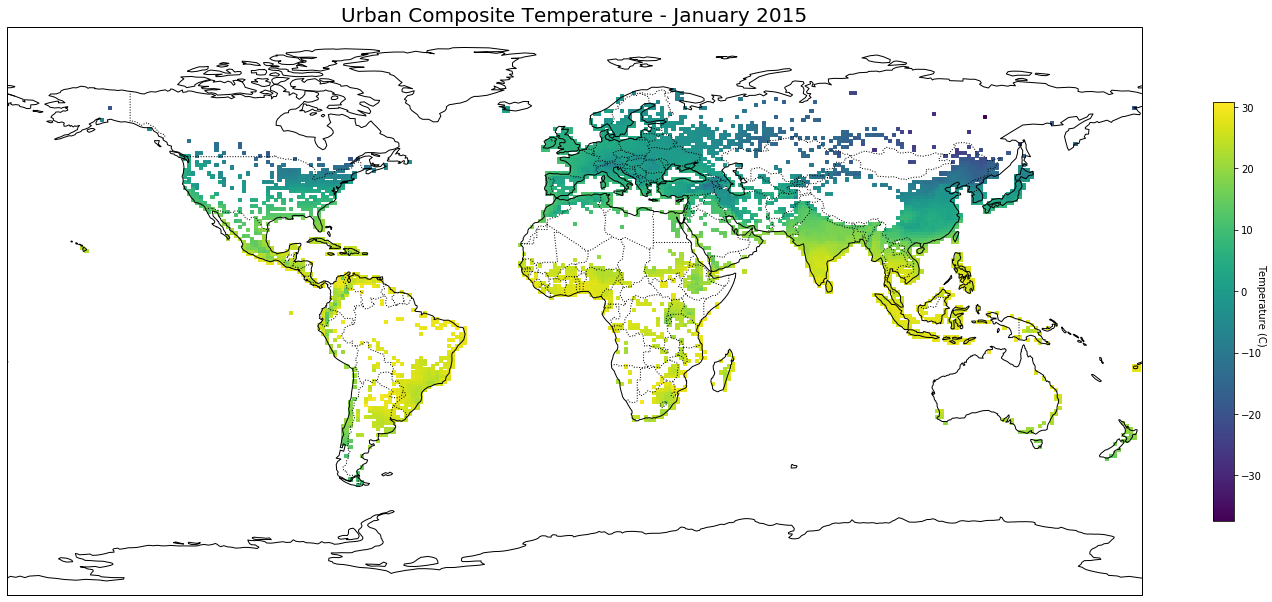

In [37]:
%%time
# Set title, figure name, and variable to plot
title = 'Urban Composite Temperature - January 2015'
figname = 'UrbanComp_Jan2015.jpg'
variable = urban_tot

# Create figure 
Graph.Plot(title, figname, variable)

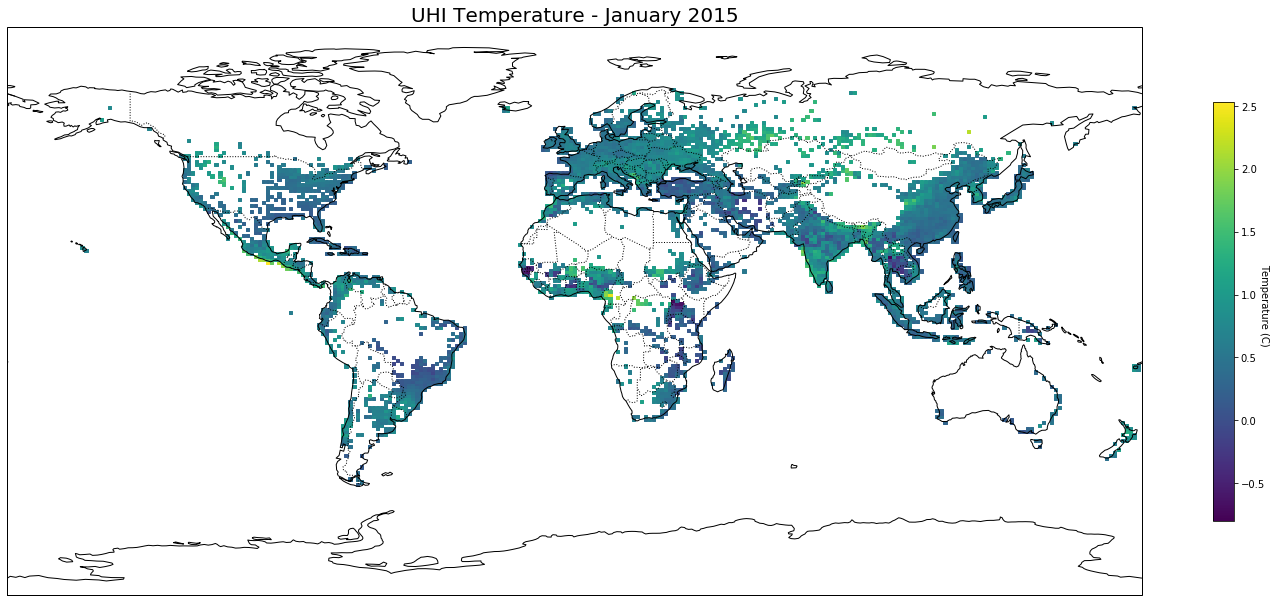

In [11]:
# Plot UHI in January 2015
title = 'UHI Temperature - January 2015'
figname = 'UHI_Jan2015.jpg'
variable = urban_tot - tsa_grid_veg + 273

Graph.Plot(title, figname, variable)